# Visualize entity statistics for annotated molecular dynamics texts 📊

### 🎯 Objectives
- Retrieve a dataframe summarizing, for each annotated text, the number of entities per class: MOLECULE (`MOL`), FORCEFIELD (`FFM`), SIMULATION_TIME (`STIME`), TEMPERATURE (`TEMP`), SOFTWARE NAME (`SOFTNAME`) and SOFTWARE VERSION (`SOFTVERS`).
- Get an overview of the entities present across all annotations.

## Load libraries

In [3]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext watermark
%watermark
%watermark --packages numpy,pandas,matplotlib,seaborn

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Last updated: 2025-11-28T16:19:13.453211+01:00

Python implementation: CPython
Python version       : 3.13.9
IPython version      : 8.13.2

Compiler    : Clang 20.1.4 
OS          : Linux
Release     : 6.14.0-36-generic
Machine     : x86_64
Processor   : x86_64
CPU cores   : 14
Architecture: 64bit

numpy     : 2.3.4
pandas    : 2.2.3
matplotlib: 3.10.7
seaborn   : 0.13.2



In [5]:
# Directories and files.
RESULTS_FILE = "../results/all_annotations_entities_count.tsv"
ANNOTATION_DIR = "../annotations/v2"

## Load results

In [6]:
def load_tsv(path: str) -> pd.DataFrame:
    """Load a TSV file into a pandas DataFrame."""
    df = pd.read_csv(path, sep="\t")
    return df

df = load_tsv(TSV_PATH)
df

,filename,text_length,TEMP_nb,SOFTNAME_nb,SOFTVERS_nb,STIME_nb,MOL_nb,FFM_nb
0,figshare_9985175.json,1582,0,0,0,0,9,4
1,figshare_19657472.json,1591,0,0,0,0,20,0
2,zenodo_1488094.json,647,1,2,1,2,10,4
3,figshare_2271034.json,1435,0,0,0,1,5,0
4,figshare_9744458.json,1509,0,0,0,0,8,0
...,...,...,...,...,...,...,...,...
375,zenodo_4451274.json,1262,0,0,0,1,2,0
376,figshare_19673947.json,1320,0,0,0,0,4,0
377,figshare_19971077.json,1500,0,0,0,0,0,0
378,figshare_3457004.json,951,0,0,0,0,7,4


## Global distribution of classes

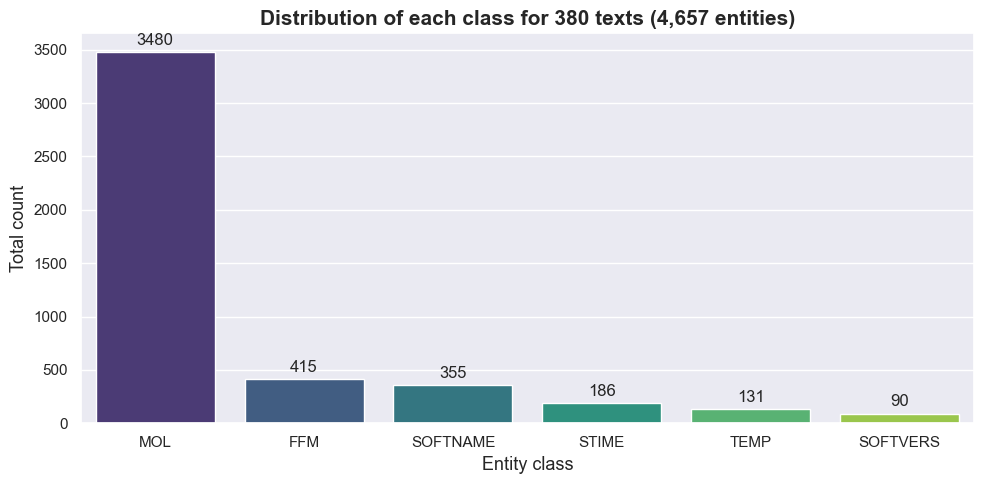

In [9]:
def plot_class_distribution(df: pd.DataFrame) -> None:
    """Plot a bar chart showing the total number of entities per class across all files."""
    sns.set_theme()
    
    total_entities = len(df)
    cols = [col for col in df.columns if col.endswith("_nb")]
    summary = df[cols].sum().sort_values(ascending=False)
    plot_df = pd.DataFrame({
        "Class": [col.replace("_nb", "") for col in summary.index],
        "Count": summary.values
    })
    plt.figure(figsize=(10, 5))
    ax = sns.barplot(data=plot_df, x="Class", y="Count", palette="viridis", hue="Class")
    # Add value labels on each bar
    for container in ax.containers:
        ax.bar_label(container, fmt="%.0f", padding=3)
    plt.title(
        f"Distribution of each class for {total_entities} texts ({np.sum(summary.values):,} entities)",
        fontsize=15, fontweight="bold"
    )
    plt.xlabel("Entity class", fontsize=13)
    plt.ylabel("Total count", fontsize=13)
    plt.tight_layout()
    plt.show()

plot_class_distribution(df)

## Distribution per class

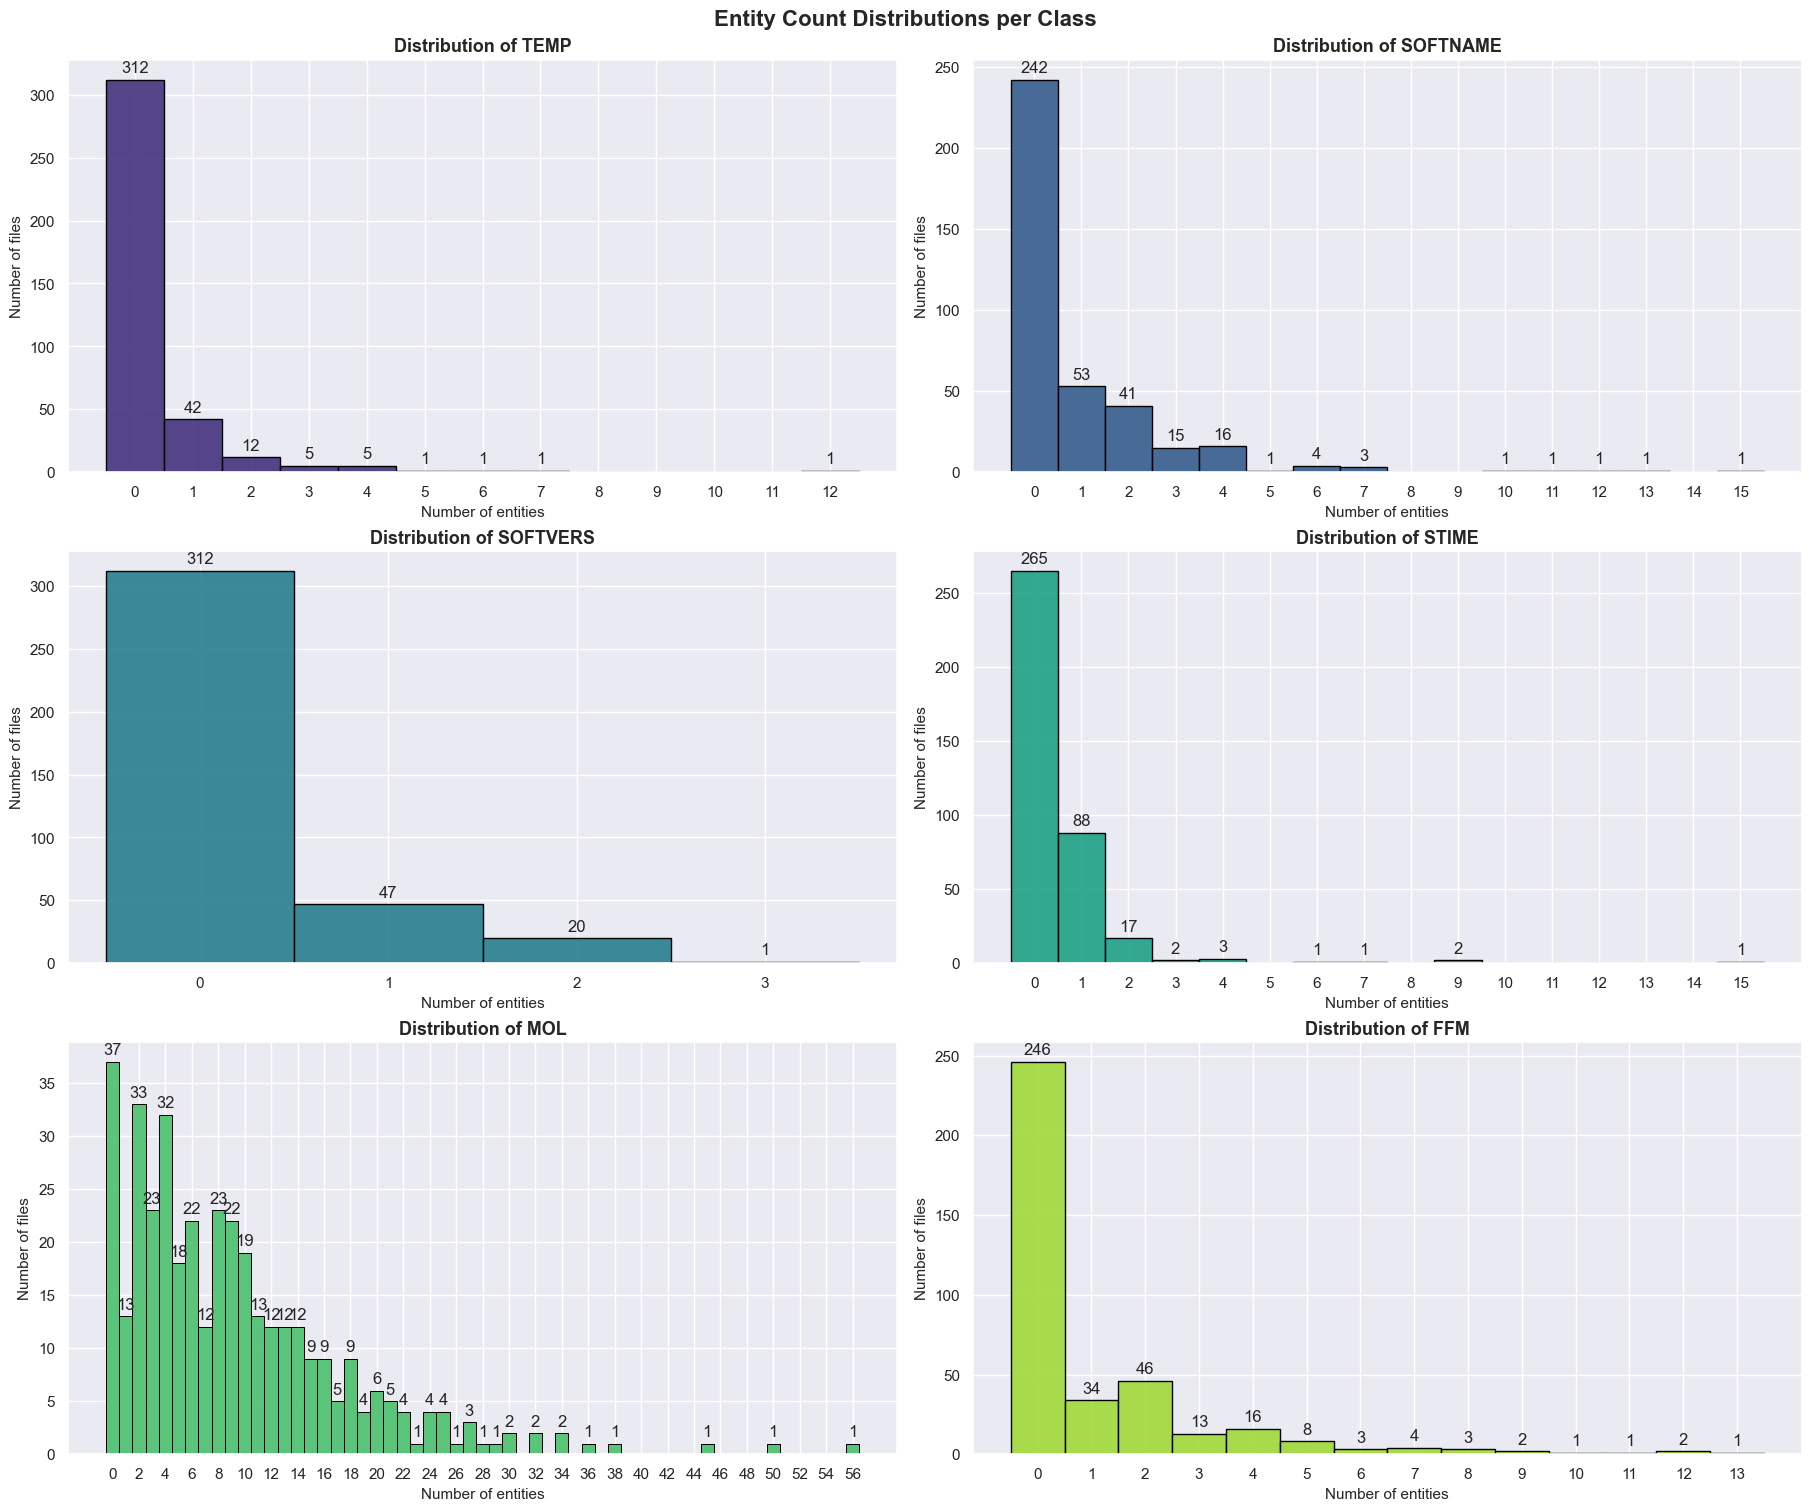

In [11]:
def plot_histograms(df: pd.DataFrame) -> None:
    """
    Plot styled histograms of entity counts for each class in a grid layout (2 per row),
    with value labels and adaptive axis ticks.
    """
    sns.set_theme(style="darkgrid")

    cols = [col for col in df.columns if col.endswith("_nb")]
    n_classes = len(cols)
    palette = sns.color_palette("viridis", n_classes)
    n_cols = 2
    n_rows = math.ceil(n_classes / n_cols)

    fig, axes = plt.subplots(
        n_rows,
        n_cols,
        figsize=(18, 5 * n_rows),
        constrained_layout=True
    )
    axes = axes.flatten()
    for i, col in enumerate(cols):
        ax = axes[i]
        data = df[col]
        max_val = int(data.max())

        sns.histplot(
            data,
            color=palette[i],
            edgecolor="black",
            alpha=0.9,
            discrete=True,
            ax=ax
        )

        # Add value labels on each bar
        for container in ax.containers:
            labels = [f"{int(v.get_height())}" if v.get_height() > 0 else "" for v in container]
            ax.bar_label(container, labels=labels, padding=3)
        # adapt the x range for MOL
        if max_val <= 20:
            step = 1
        else:
            step = 2

        ax.set_xticks(np.arange(0, max_val + 1, step))
        ax.set_title(f"Distribution of {col.replace("_nb", "")}", fontsize=13, fontweight="bold")
        ax.set_xlabel("Number of entities", fontsize=11)
        ax.set_ylabel("Number of files", fontsize=11)


    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    fig.suptitle("Entity Count Distributions per Class", fontsize=16, fontweight="bold")
    plt.show()
    
plot_histograms(df)